In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
df.drop(0, axis=1, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
test_set = df.replace({99: np.nan})
test_set.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [6]:
test_set.describe(include = 'all')

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,16452.000000,18184.000000,16642.000000,15608.000000,24977.000000,20431.000000,24976.000000,24981.000000,15752.000000,20324.000000,...,9672.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10520.000000,10666.000000,10910.000000,9943.000000
mean,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,5.171798,5.597327,5.399806,5.234654,5.255700,4.900540,5.495931,4.929144,5.162224,5.087359,...,5.060445,5.127291,4.611339,5.140307,5.167043,4.852069,5.025076,5.393833,5.176806,5.300409
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-2.670000,-4.420000,-4.030000,-5.870000,-3.690000,-1.310000,-5.290000,-4.610000,-4.760000,-2.090000,...,-0.932500,-2.380000,-0.100000,-2.280000,-2.570000,-1.347500,-1.170000,-3.400000,-4.170000,-2.330000
50%,1.600000,0.830000,0.780000,-1.460000,1.120000,2.230000,-0.050000,-0.290000,-0.190000,1.940000,...,2.860000,1.800000,3.160000,1.750000,1.650000,2.140000,2.480000,1.460000,0.290000,2.140000
75%,4.900000,4.820000,4.660000,2.520000,4.470000,5.440000,3.880000,3.060000,3.300000,5.390000,...,6.120000,5.290000,6.070000,5.290000,5.100000,5.277500,5.630000,5.150000,3.980000,5.730000
max,9.370000,9.370000,9.370000,9.370000,9.370000,9.470000,9.610000,9.760000,9.900000,9.370000,...,9.560000,9.420000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.370000,9.370000


In [7]:
#Finding the best- and the worst-rated jokes
average = test_set.mean(axis = 0)
average.sort_values(ascending = False)

50    3.665085
89    3.574720
36    3.312500
27    3.189821
32    3.155988
        ...   
13   -1.762882
57   -1.990664
44   -2.111891
16   -3.104818
58   -3.833880
Length: 100, dtype: float64

In [8]:
arr = test_set.values # Labeling the label 10% of the dataset cells that are not NaNs as 99
print(arr.shape)  

(24983, 100)


In [9]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [10]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(orig!= np.nan)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [11]:
new_arr, idx = replace(arr, 0.1)

In [12]:
arr[idx[0][0], idx[1][0]]

-3.98

In [13]:
n_latent_factors = 2

user_ratings = df.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [14]:
latent_item_features

array([[0.96338949, 0.29441478],
       [0.35674491, 0.50468526],
       [0.06878448, 0.51942692],
       [0.56374686, 0.66733741],
       [0.6080971 , 0.5831635 ],
       [0.97885632, 0.79604145],
       [0.18252218, 0.12370797],
       [0.87063157, 0.36038471],
       [0.94283365, 0.27506168],
       [0.05236469, 0.37566896],
       [0.18926514, 0.83137082],
       [0.77970724, 0.89622157],
       [0.37501176, 0.72649459],
       [0.22328452, 0.70481653],
       [0.47012363, 0.73173819],
       [0.73224737, 0.54715368],
       [0.99747688, 0.95715363],
       [0.28213836, 0.1075111 ],
       [0.57396688, 0.43585656],
       [0.48162159, 0.87567102],
       [0.12164419, 0.99769375],
       [0.64665307, 0.77235965],
       [0.66646148, 0.04230492],
       [0.73370553, 0.83880421],
       [0.59396892, 0.42178723],
       [0.77979844, 0.56101934],
       [0.05616322, 0.03749081],
       [0.0348452 , 0.32263008],
       [0.61644094, 0.83465909],
       [0.79199094, 0.95256067],
       [0.

In [25]:
df.iloc[2755,10]

-6.65

In [16]:
df.iloc[20732, 52] #rating that user 20732 has given to joke 52

5.73

In [17]:
latent_user_preferences

array([[0.98423296, 0.89525768],
       [0.62512849, 0.80359728],
       [0.62760869, 0.13347729],
       ...,
       [0.53743125, 0.9638371 ],
       [0.15361058, 0.9054228 ],
       [0.1048467 , 0.02839537]])

In [18]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [19]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.21177679, 0.80294345, 0.53272089, ..., 1.28844169, 0.96476984,
        1.29065928],
       [0.83883313, 0.62857511, 0.4604092 , ..., 0.99742782, 0.75406103,
        0.91447708],
       [0.64392931, 0.29126023, 0.11250144, ..., 0.48824406, 0.35219123,
        0.64668509],
       ...,
       [0.80152351, 0.67816024, 0.53760986, ..., 1.0655405 , 0.81241596,
        0.89622774],
       [0.41455667, 0.51175333, 0.480867  , ..., 0.78464243, 0.61098903,
        0.51009905],
       [0.10936823, 0.05173425, 0.02196115, ..., 0.08621144, 0.0625023 ,
        0.11049134]])

Iteration 0/30:	MSE=26.174412


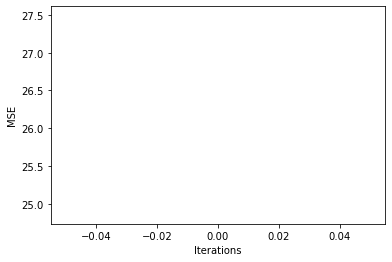

In [20]:
num_iter = 30
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [24]:
df_movie = pd.read_excel("movies_latent_factors.xlsx")
df_movie.head()

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [37]:
df_users = pd.read_excel('movies_latent_factors.xlsx', 'Users')
df_users.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [28]:
df_movie[df_movie['Movie ID'] == 329]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
35,329,Jurassic Park (1993),-0.104238,-1.105404,-0.49763,0.459678,-1.146451,0.842279,0.224978,0.541354,1.570226,-0.633001,1.053255,-0.526942,0.082476,-0.005909,1.466918


In [31]:
#which of the following IDs corresponds to the movie with the lowest loading of factor 9?

bb = df_movie[['Movie ID','Factor14','Title']]
bb.sort_values('Factor14')

,Movie ID,Factor14,Title
43,558,-2.381119,Spider-Man 2 (2004)
42,557,-2.295379,Spider-Man (2002)
2,13,-2.209004,Forrest Gump (1994)
26,197,-1.532101,Braveheart (1995)
97,36657,-1.355542,X-Men (2000)
...,...,...,...
83,2501,1.561781,The Bourne Identity (2002)
22,161,1.625843,Ocean's Eleven (2001)
84,2502,1.627139,The Bourne Supremacy (2004)
71,954,1.649491,Mission: Impossible (1996)


In [32]:
#Rating Predicitiom Function
from pandas.core.arrays.numeric import T
def predict_rating(user_id, movie_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = df_users[df_users["User"] == user_id]
    movie_preference = df_movie[df_movie["Movie ID"]  == movie_id]
    user_preference = user_preference.drop(user_preference.columns[[0]], axis = 1)
    movie_preference = movie_preference.drop(movie_preference.columns[[0,1]], axis = 1)
    user_preference = user_preference.to_numpy()
    movie_preference = movie_preference.to_numpy()

    return user_preference.dot(movie_preference.T)

In [38]:
# to predict the rating that the user with ID 525 will give to the movie with ID 1891
predict_rating(525, 1891)

array([[-0.0316595]])

In [39]:
# to predict the rating that the user with ID 768 will give to the movie with ID 424
predict_rating(768, 424)

array([[0.01493694]])

In [40]:
from pandas.core.arrays.numeric import T
def predict_movies(user_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = df_users[df_users["User"] == user_id]
    user_preference = user_preference.drop(user_preference.columns[[0]], axis = 1)
    movie_preference = df_movie.drop(df_movie.columns[[0,1]], axis = 1)
    user_preference = user_preference.to_numpy()
    movie_preference = movie_preference.to_numpy()

    return user_preference.dot(movie_preference.T)

In [42]:
#In the movies dataset, if you had to recommend 2 movies to the user with ID=4327, which ones would you choose?
mv =predict_movies(4327)
ss = np.argsort(mv.flatten())[::-1] #Sorting  the userid
df_movie.iloc[ss[0:2], 1]

47          Titanic (1997)
35    Jurassic Park (1993)
Name: Title, dtype: object

In [46]:
#In the movies dataset, if you had to recommend 2 movies to the user with ID=4469, which ones would you choose?
mv =predict_movies(4469)
ss = np.argsort(mv.flatten())[::-1] #Sorting  the userid
df_movie.iloc[ss[0:2], 1]

33    The Shawshank Redemption (1994)
39            A Beautiful Mind (2001)
Name: Title, dtype: object